In [1]:
# Importar a biblioteca pandas para acessar o banco de dados
import pandas as pd
import numpy as np

In [2]:
# Informar o arquivo usado
arquivo = './dataset/hcvdat0.csv'

# Criar um DataFrame
dados = pd.read_csv(arquivo)

# Mostrar o conjunto de dados
dados

Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.17  4.80   74.0   15.6  76.5  
2     8.84  5.20   86.0   33.2  79.3  
3     7.33  4.74   80.0   33.8  75.7  
4     9.15  4.32   76.0   29.9  68.7  
..     ...   ...    ...    ...   ...  
610   5.57  6.30   55.7  650.9  68.5  
611   1.54  3.02   63.0   35.9  71.3  
612   1.66  3.63   66.7   64.2  82.0  
613   3.56  4.20   52.0   50.0  71.0  
614   9.07  5.30   67.0   34.0  68.0  

[615 rows x 14 columns]

In [3]:
# Excluir a coluna desejada
dados.drop(['Unnamed: 0'], axis=1, inplace=True)

# Mostrar o conjunto de dados
dados

Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...    ...    ...   ...    ...   ...   
610    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66  3.63   
613    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56  4.20   
614    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5  
2     86.0   33.2  79.3  
3     80.0   33.8  75.7  
4     76.0   29.9  68.7  
..     ...    ...   ...  
610   55.7  650.9  68.5  
611   63.0   35.9  71.3  
612   66.7   64.2  82.0  
613   52.0   50.0  71.0  
614   67.0   34.0  68.0  

[615 rows x 13 columns]

In [4]:
# 0 ==  0=Blood Donor e 0s=suspect Blood
# 1 == 1=Hepatitis, 2=Fibrosis e 3=Cirrhosis
dados['Category'].replace('0=Blood Donor', 0, inplace=True)
dados['Category'].replace('0s=suspect Blood Donor', 0, inplace=True)
dados['Category'].replace('1=Hepatitis', 1, inplace=True)
dados['Category'].replace('2=Fibrosis', 1, inplace=True)
dados['Category'].replace('3=Cirrhosis', 1, inplace=True)

# Mostrar a coluna "Categoria"
dados['Category']

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [6]:
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')

# 处理缺失值

In [7]:
dados.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
dados.shape

(615, 13)

In [9]:
dados['ALP'].replace(np.NaN,dados['ALP'].mode()[0],inplace=True)

In [10]:
dados['PROT'].replace(np.NaN,dados['PROT'].mode()[0],inplace=True)

In [11]:
dados['PROT'].replace(np.NaN,dados['PROT'].mode()[0],inplace=True)

In [12]:
dados['CHOL'].replace(np.NaN,dados['CHOL'].mode()[0],inplace=True)

In [13]:
dados['ALT'].replace(np.NaN,dados['ALT'].mode()[0],inplace=True)

In [14]:
dados['ALB'].replace(np.NaN,dados['ALB'].mode()[0],inplace=True)

In [15]:
dados.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [16]:
# O primeiro argumento de loc informa as linhas que queremos selecionar, no caso, todas
# O segundo argumento de loc informa qual o intervalo de coluna que queremos pegar, no caso, todas
# O -1 informa que queremos que seja feito o novo conjunto de dados de trás para frente
dados = dados.loc[:, ::-1]

# Mostrar o conjunto de dados
dados

PROT    GGT   CREA  CHOL    CHE   BIL    AST    ALT    ALP   ALB Sex  \
0    69.0   12.1  106.0  3.23   6.93   7.5   22.1    7.7   52.5  38.5   m   
1    76.5   15.6   74.0  4.80  11.17   3.9   24.7   18.0   70.3  38.5   m   
2    79.3   33.2   86.0  5.20   8.84   6.1   52.6   36.2   74.7  46.9   m   
3    75.7   33.8   80.0  4.74   7.33  18.9   22.6   30.6   52.0  43.2   m   
4    68.7   29.9   76.0  4.32   9.15   9.6   24.8   32.6   74.1  39.2   m   
..    ...    ...    ...   ...    ...   ...    ...    ...    ...   ...  ..   
610  68.5  650.9   55.7  6.30   5.57  50.0  110.3    5.9  416.6  32.0   f   
611  71.3   35.9   63.0  3.02   1.54  20.0   44.4    2.9  102.8  24.0   f   
612  82.0   64.2   66.7  3.63   1.66  48.0   99.0    3.5   87.3  29.0   f   
613  71.0   50.0   52.0  4.20   3.56  20.0   62.0   39.0   52.5  33.0   f   
614  68.0   34.0   67.0  5.30   9.07  12.0   80.0  100.0   52.5  36.0   f   

     Age  Category  
0     32         0  
1     32         0  
2     32         0  
3     32         0  
4     32         0  
..   ...       ...  
610   62         1  
611   64         1  
612   64         1  
613   46         1  
614   59         1  

[615 rows x 13 columns]

In [17]:
dados.describe().T

count       mean        std    min     25%    50%     75%      max
PROT      615.0  72.043902   5.398238  44.80  69.300  72.20  75.400    90.00
GGT       615.0  39.533171  54.661071   4.50  15.700  23.30  40.200   650.90
CREA      615.0  81.287805  49.756166   8.00  67.000  77.00  88.000  1079.10
CHOL      615.0   5.363252   1.124100   1.43   4.620   5.29   6.055     9.67
CHE       615.0   8.196634   2.205657   1.42   6.935   8.26   9.590    16.41
BIL       615.0  11.396748  19.673150   0.80   5.300   7.30  11.200   254.00
AST       615.0  34.786341  33.090690  10.60  21.600  25.90  32.900   324.00
ALT       615.0  28.431545  25.453426   0.90  16.400  23.00  33.050   325.30
ALP       615.0  67.821951  25.781819  11.30  52.500  65.30  79.300   416.60
ALB       615.0  41.615935   5.776886  14.90  38.800  41.90  45.200    82.20
Age       615.0  47.408130  10.055105  19.00  39.000  47.00  54.000    77.00
Category  615.0   0.121951   0.327496   0.00   0.000   0.00   0.000     1.00

In [18]:
# Mostrar os valores únicos da coluna desejada
dados['Sex'].unique()

array(['m', 'f'], dtype=object)

In [19]:
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [20]:
#sns.set_theme()
#style.use('fivethirtyeight')

In [21]:
# Definir as cores que serão usadas nos gráficos
cores = ['lightcoral', 'deepskyblue', 'orchid', 'tomato', 'teal', 'darkcyan', 'limegreen', 'darkorange']

In [22]:
# Definir a função do gráfico de pizza
def grafico_pizza(data_frame, coluna, cores, explode, titulo, fonte):
    # Fazer contagem dos valores da coluna selecionada
    df = data_frame[coluna].value_counts()
    
    # Determinar o tamannho da plotagem
    plt.figure(figsize=(15, 10))
    
    # Criar o gráfico de pizza
    _, _, pacotes = plt.pie(df,
                            colors=cores,
                            labels=df.index,
                            explode=explode,
                            shadow=True,
                            startangle=90,
                            autopct='%1.1f%%',
                            textprops={'fontsize': fonte,
                                      'color': 'black',
                                      'weight': 'bold',
                                      'family': 'serif'})
    
    # Plotar o gráfico de pizza
    plt.setp(pacotes, color='snow')
    
    # Colocar o título do gráfico
    plt.title(titulo, size=45)
    
    # Desenhar o círculo interno
    circulo_centro = plt.Circle((0, 0), 0.40, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circulo_centro)

In [23]:
# Definir o gráfico da função de distribuição
def grafico_distribuicao(data_frame, coluna, titulo):
    # Armazenar os dados da coluna
    dados = data_frame[coluna]
    
    # Determinar a figura e seu tamanho
    fig = plt.figure(figsize=(17, 7))
    
    # Criar a grade em que os gráficos serão plotados
    grade = GridSpec(nrows=2, ncols=1, figure=fig)
    
    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]
    
    # Motrar o valor de assimetria dos dados
    print(f'Assimetria de {titulo}: {np.round(dados.skew(), 3)}')
    
    # Plotar o histograma
    ax0 = fig.add_subplot(grade[0, :])
    ax0.set_title(f'Histograma e BoxPlot de {titulo}', y=1.05)
    sns.histplot(data=dados, ax=ax0, color=cor)
    
    # Plotar o BoxPlot
    ax1 = fig.add_subplot(grade[1, :])
    plt.axis('off')
    sns.boxplot(x=dados, ax=ax1, color=cor)

In [24]:
# Definir o gráfico de influência
def grafico_influencia(data_frame, coluna, bins, labels, titulo, com_bins=True):
    # Armazenar os dados da coluna
    influencia = data_frame.loc[:, [coluna, 'Category']]
    
    # Se os dados de "coluna" não forem como classe, então terá intervalos ("bins" e "labels")
    if com_bins:
        influencia[coluna] = pd.cut(influencia[coluna],
                                  bins=bins,
                                 labels=labels)
        
    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]
    
    # Determinar o tamanho da figura
    plt.figure(figsize=(15, 5))
    
    # Criar o gráfico
    grafico = sns.pointplot(x=coluna, y='Category', dodge=0.1, capsize=.1, data=influencia, color=cor)
    
    # Colocar o título do gráfico
    grafico.set_title(f'{titulo} influência', fontsize=25)

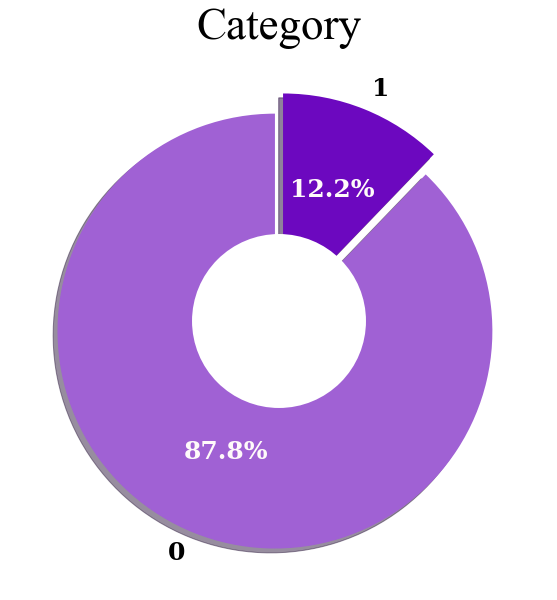

In [25]:
grafico_pizza(dados, 'Category', ('#a061d4', '#6c08bf'), (0.05, 0.05), 'Category', 25)

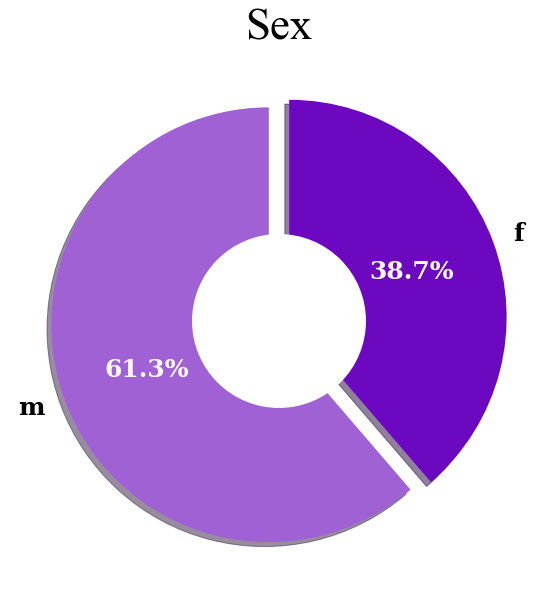

In [26]:
grafico_pizza(dados, 'Sex', ('#a061d4', '#6c08bf'), (0.05, 0.05), 'Sex', 25)

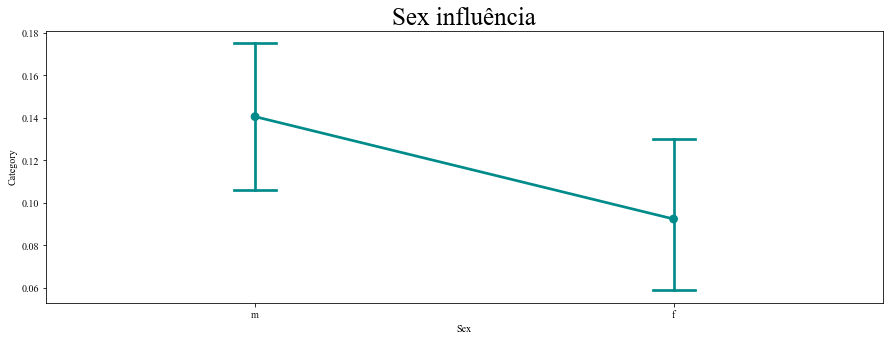

In [27]:
grafico_influencia(dados, 'Sex', None, None, 'Sex', False)

Assimetria de Age: 0.267


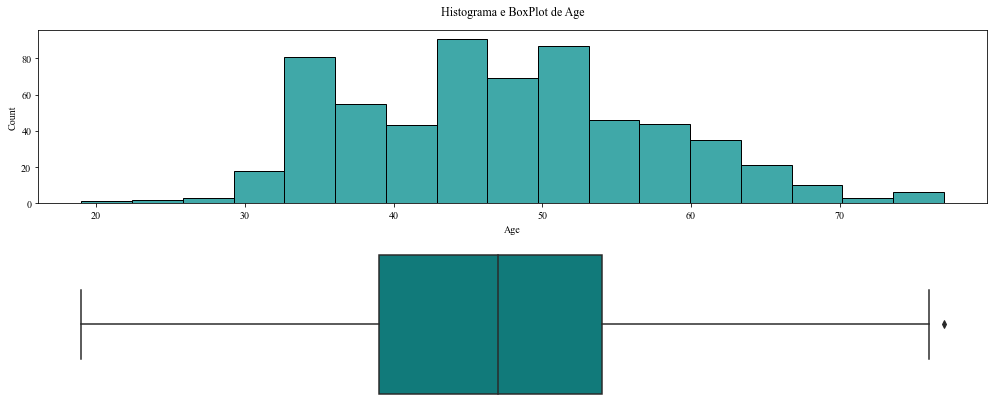

In [28]:
grafico_distribuicao(dados, 'Age', 'Age')

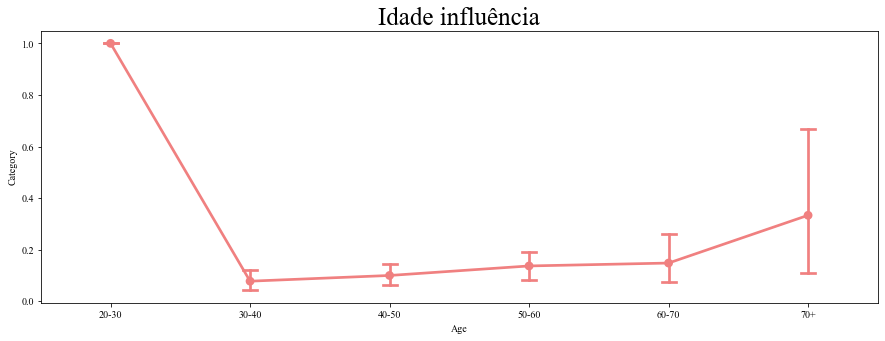

In [29]:
grafico_influencia(dados, 'Age', [20, 30, 40, 50, 60, 70, 80],
                   ['20-30', '30-40', '40-50', '50-60', '60-70', '70+'], 'Idade')

Assimetria de Albumina: -0.175


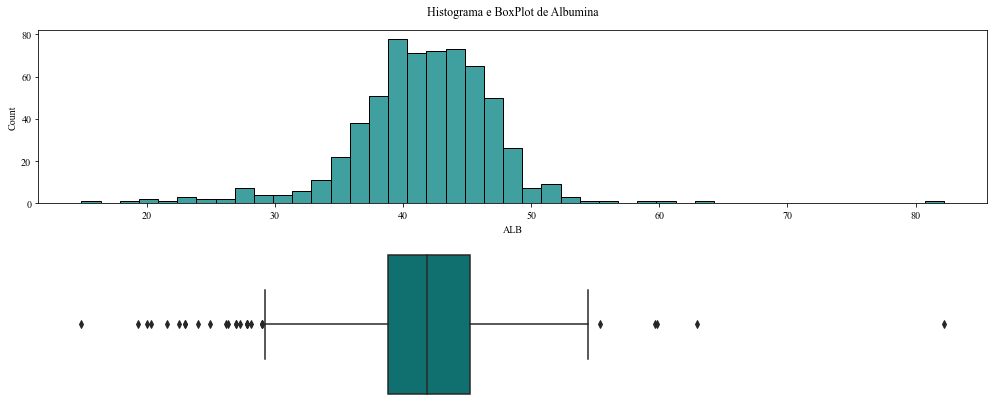

In [30]:
grafico_distribuicao(dados, 'ALB', 'Albumina')

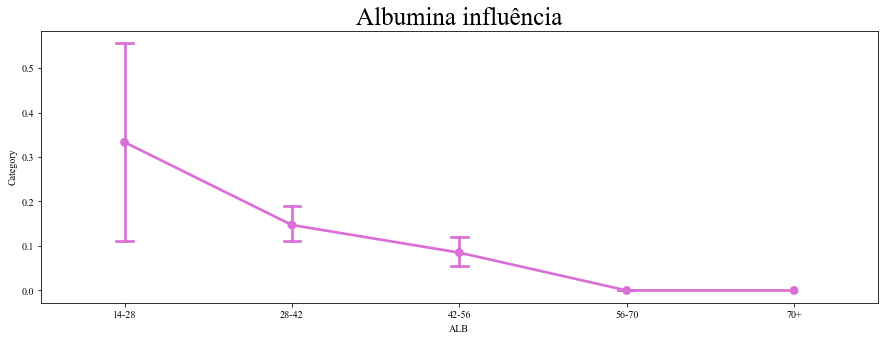

In [31]:
grafico_influencia(dados, 'ALB', [14, 28, 42, 56, 70, 84],
                   ['14-28', '28-42', '42-56', '56-70', '70+'], 'Albumina')

Assimetria de Fosfatase Alcalina: 4.696


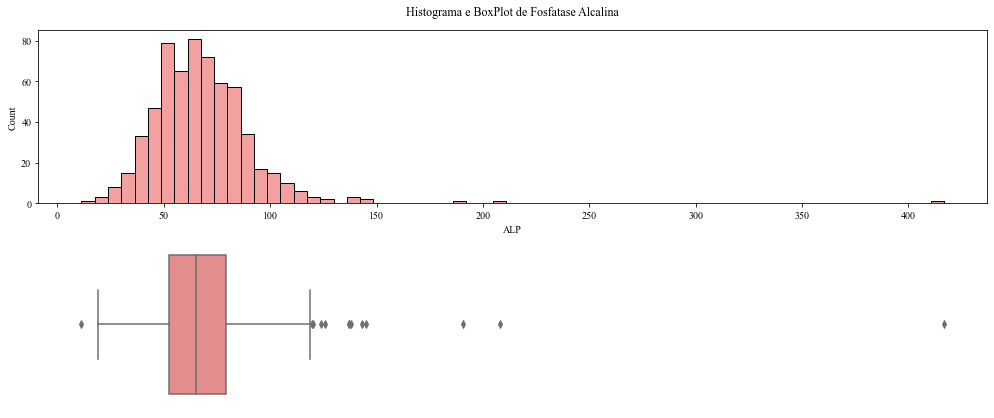

In [32]:
grafico_distribuicao(dados, 'ALP', 'Fosfatase Alcalina')

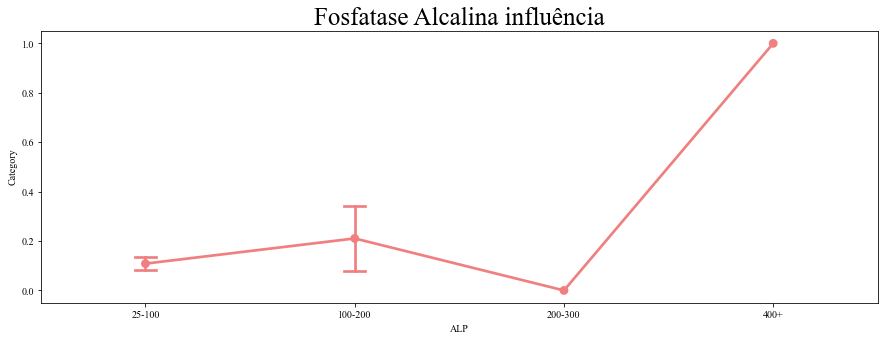

In [33]:
grafico_influencia(dados, 'ALP', [25, 100, 200, 400, 500],
                   ['25-100', '100-200', '200-300', '400+'], 'Fosfatase Alcalina')

Assimetria de Alanina Aminotransferase: 5.51


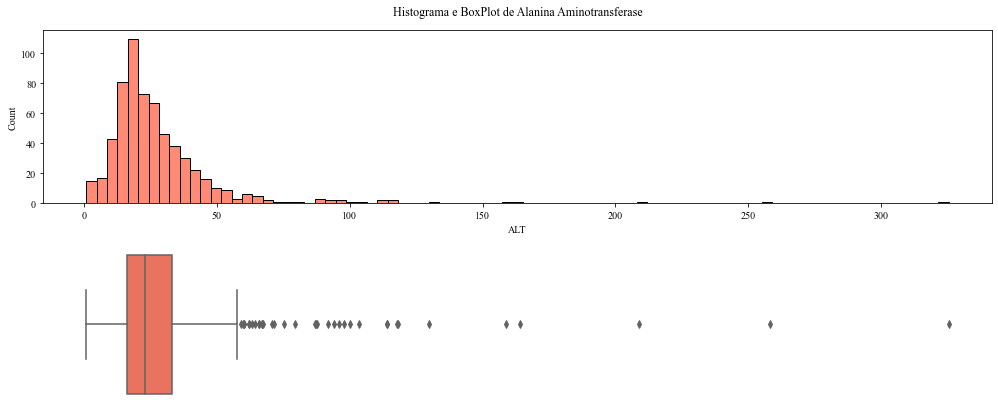

In [34]:
grafico_distribuicao(dados, 'ALT', 'Alanina Aminotransferase')

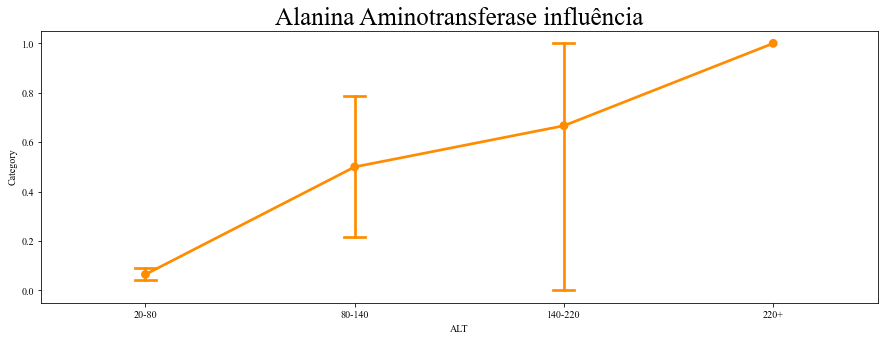

In [35]:
grafico_influencia(dados, 'ALT', [20, 80, 140, 220, 300],
                   ['20-80', '80-140', '140-220', '220+'], 'Alanina Aminotransferase')

Assimetria de Aspartato Aminotransferase: 4.94


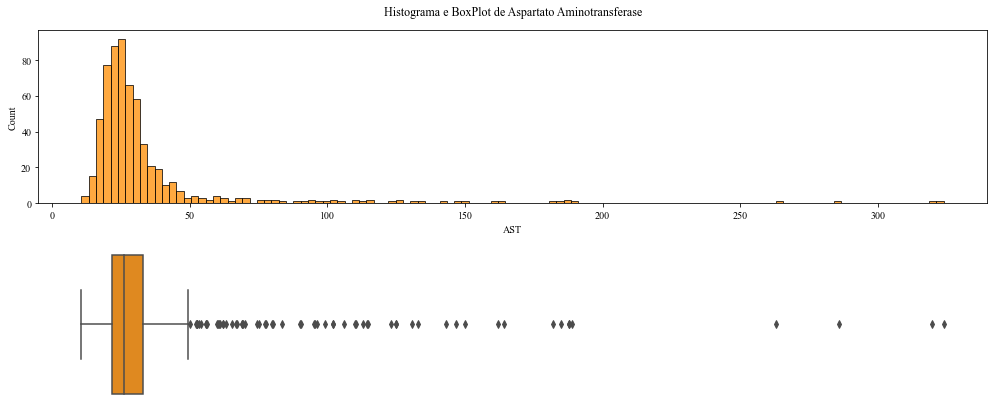

In [36]:
grafico_distribuicao(dados, 'AST', 'Aspartato Aminotransferase')

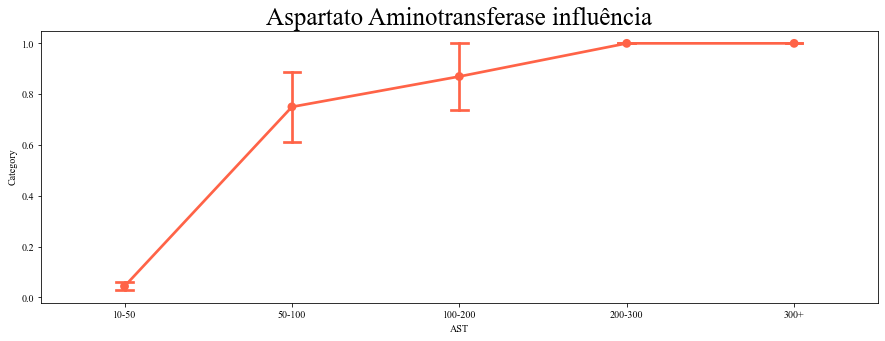

In [37]:
grafico_influencia(dados, 'AST', [10, 50, 100, 200, 300, 400],
                   ['10-50', '50-100', '100-200', '200-300', '300+'], 'Aspartato Aminotransferase')

Assimetria de Bilirrubina: 8.385


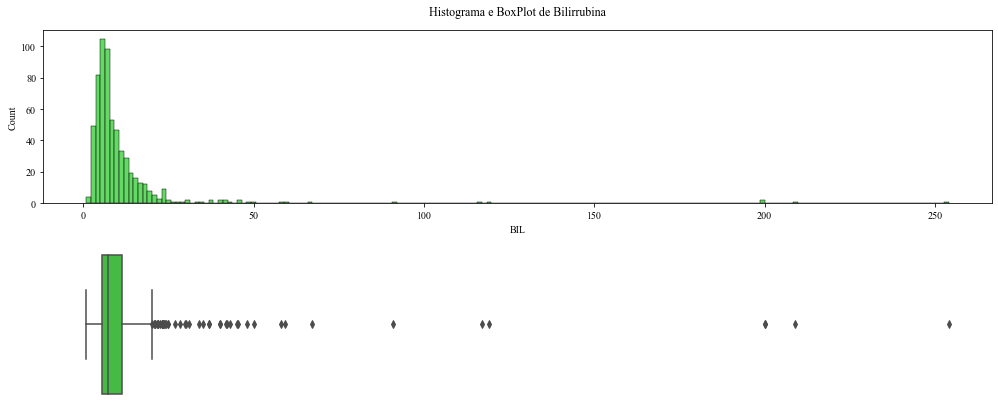

In [38]:
grafico_distribuicao(dados, 'BIL', 'Bilirrubina')

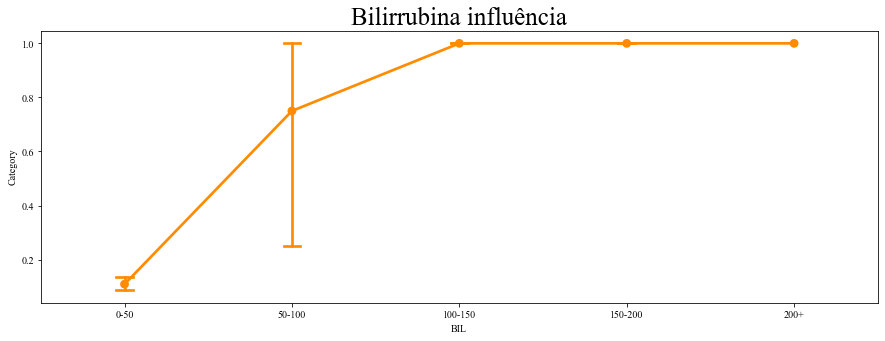

In [39]:
grafico_influencia(dados, 'BIL', [0, 50, 100, 150, 200, 250],
                   ['0-50', '50-100', '100-150', '150-200', '200+'], 'Bilirrubina')

Assimetria de Colinesterase: -0.11


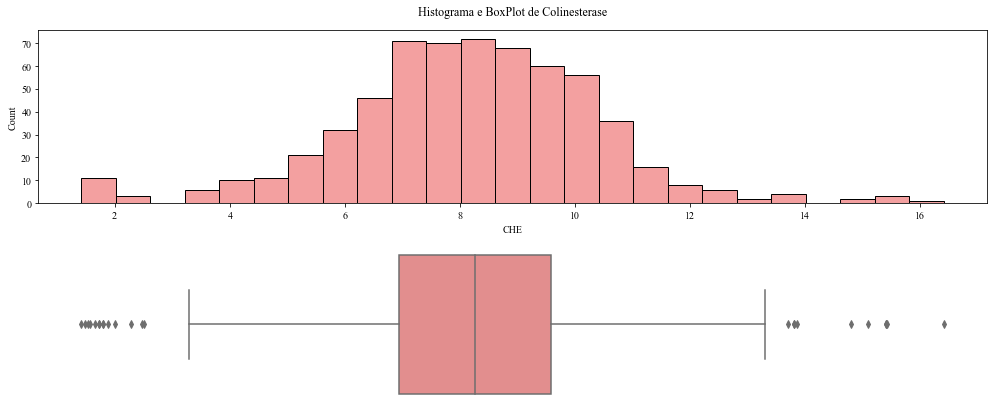

In [40]:
grafico_distribuicao(dados, 'CHE', 'Colinesterase')

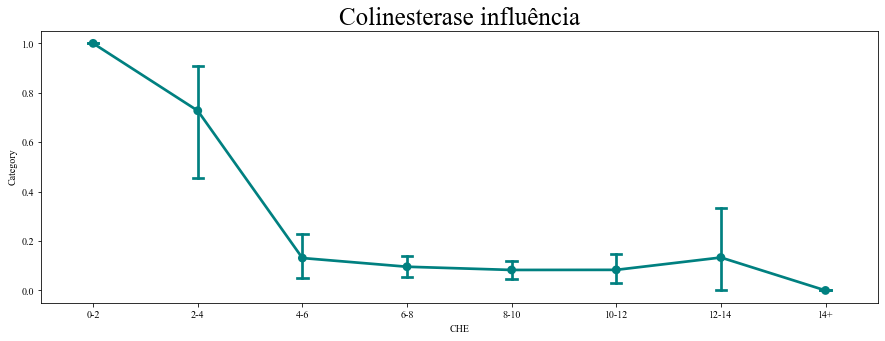

In [41]:
grafico_influencia(dados, 'CHE', [0, 2, 4, 6, 8, 10, 12, 14, 16],
                  ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14+'], 'Colinesterase')

Assimetria de Colesterol: 0.391


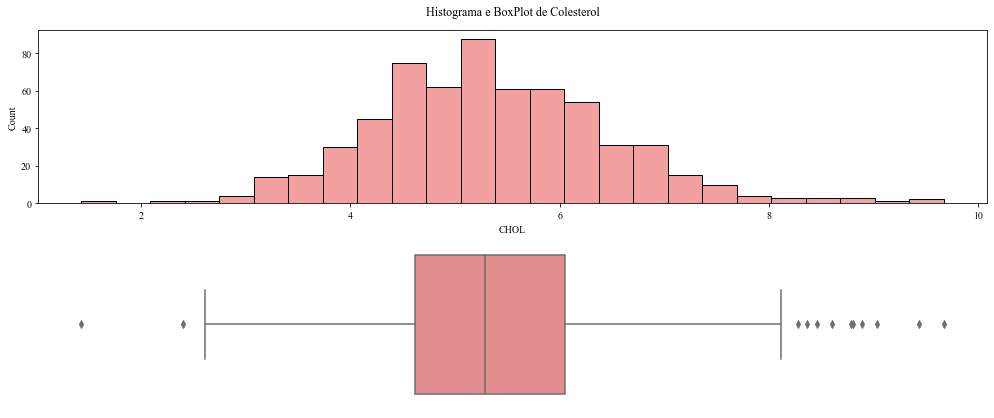

In [42]:
grafico_distribuicao(dados, 'CHOL', 'Colesterol')

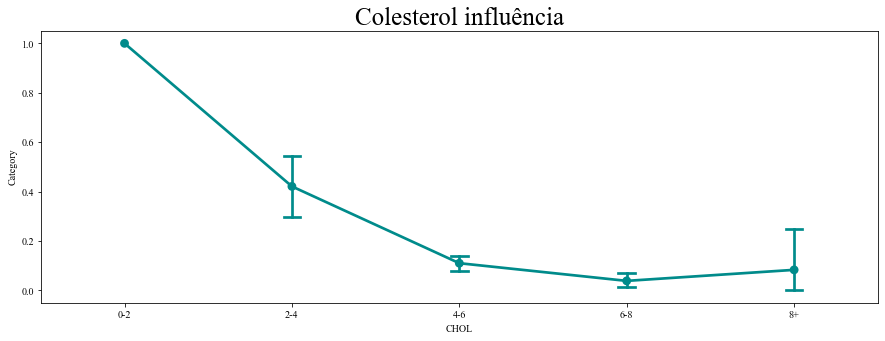

In [43]:
grafico_influencia(dados, 'CHOL', [0, 2, 4, 6, 8, 10],
                  ['0-2', '2-4', '4-6', '6-8', '8+'], 'Colesterol')

Assimetria de Creatinina: 15.169


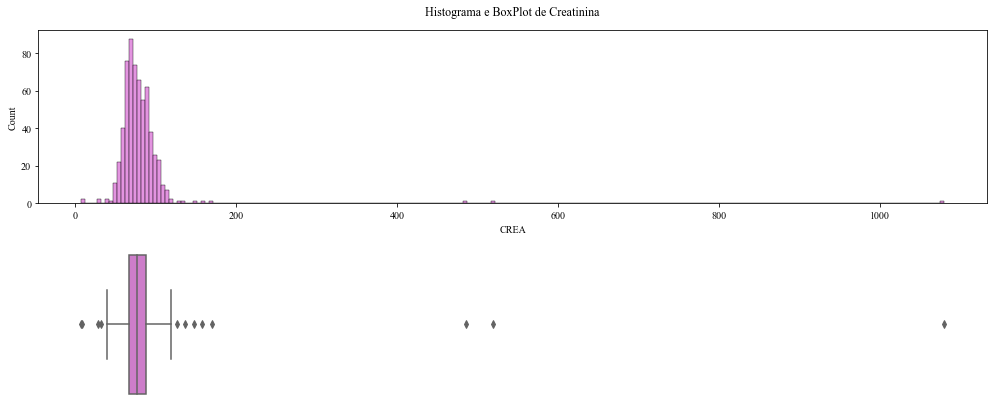

In [44]:
grafico_distribuicao(dados, 'CREA', 'Creatinina')

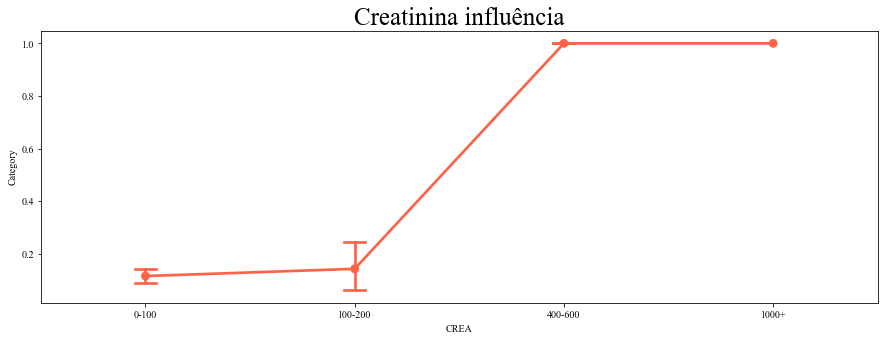

In [45]:
grafico_influencia(dados, 'CREA', [0, 100, 400, 600, 1200],
                  ['0-100', '100-200', '400-600', '1000+'], 'Creatinina')

Assimetria de Gama GT: 5.633


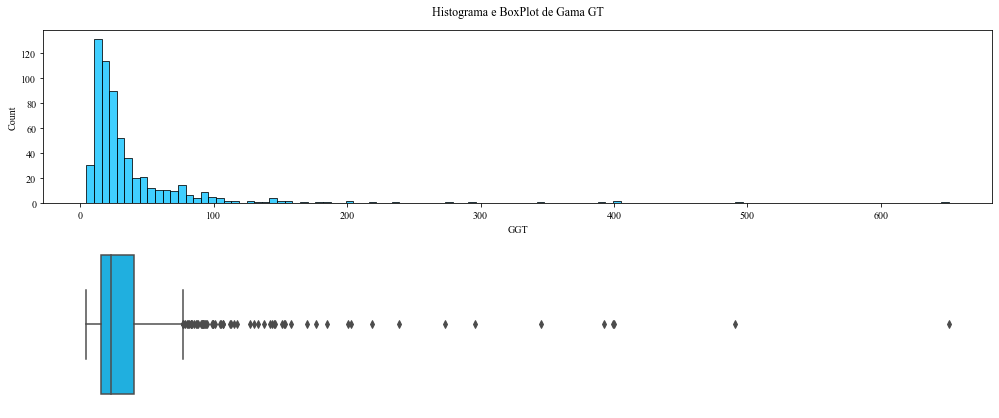

In [46]:
grafico_distribuicao(dados, 'GGT', 'Gama GT')

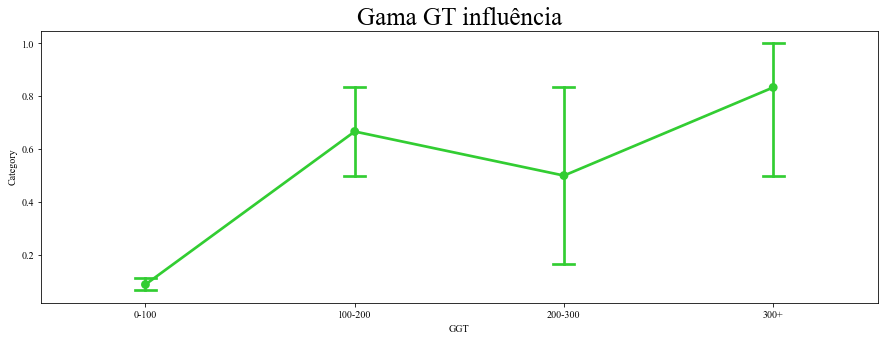

In [47]:
grafico_influencia(dados, 'GGT', [0, 100, 200, 300, 1000],
                  ['0-100', '100-200', '200-300', '300+'], 'Gama GT')

Assimetria de Proteína: -0.964


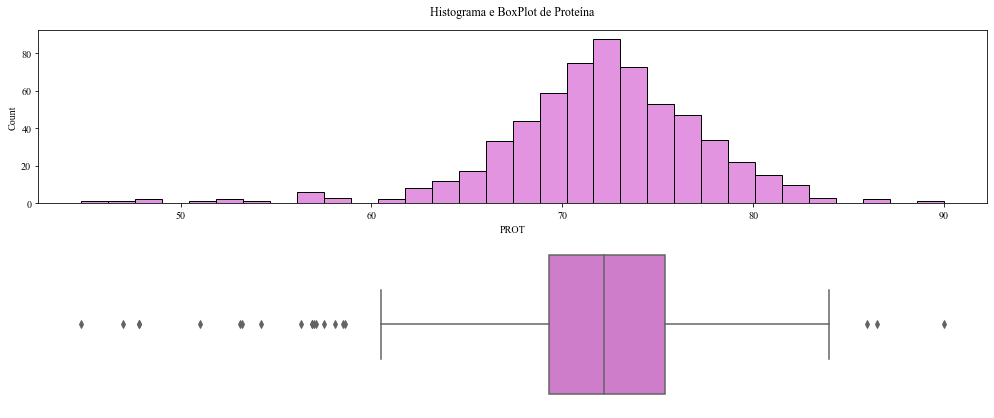

In [48]:
grafico_distribuicao(dados, 'PROT', 'Proteína')

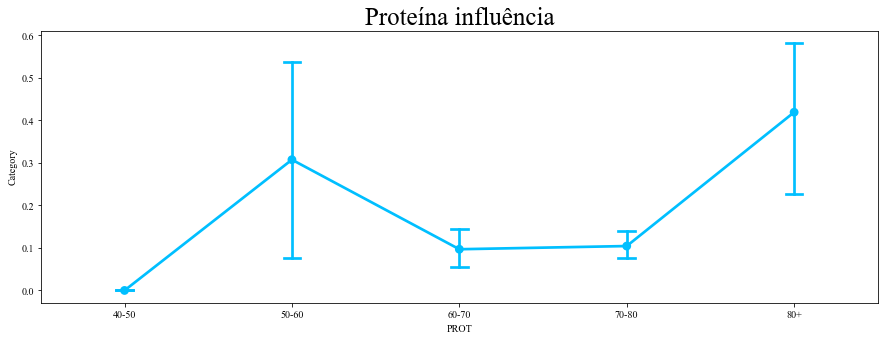

In [49]:
grafico_influencia(dados, 'PROT', [40, 50, 60, 70, 80, 90],
                  ['40-50', '50-60', '60-70', '70-80', '80+'], 'Proteína')

In [50]:
from sklearn import preprocessing

In [51]:
# Criar uma lista para armazenar as colunas que possuem o dtype igual a object
colunas = [coluna for coluna in dados.columns if dados[coluna].dtype == 'object']

# Criar o codificador
codificador = preprocessing.LabelEncoder()

# Codificar cada coluna do conjunto de dados presente em "colunas"
for coluna in colunas:
    dados[coluna] = codificador.fit_transform(dados[coluna])

In [52]:
dados['Sex']

0      1
1      1
2      1
3      1
4      1
      ..
610    0
611    0
612    0
613    0
614    0
Name: Sex, Length: 615, dtype: int32

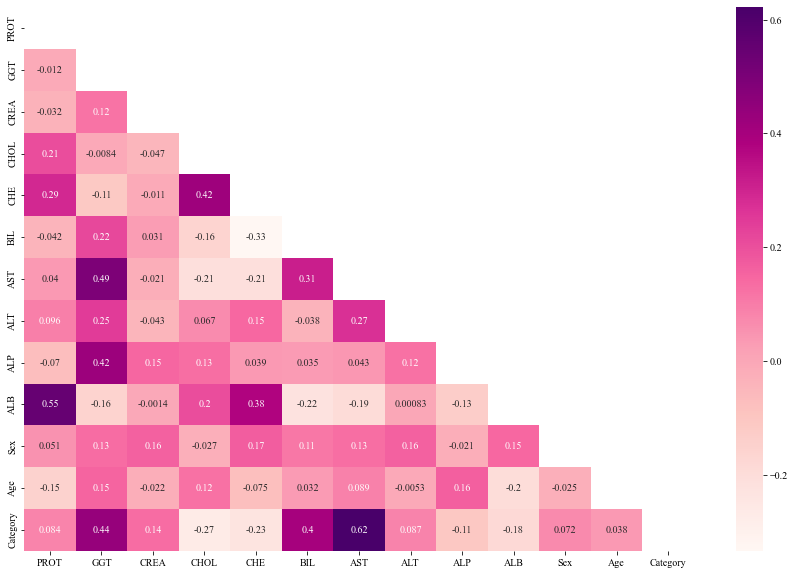

In [53]:
# Dimensões da plotagem
plt.figure(figsize=(15, 10))

# Criar a máscara para mostrar somente a metade das correlações
mascara = np.triu(dados.corr())

# Criar o heatmap (mapa de calor)
sns.heatmap(data=dados.corr(), cmap='RdPu', mask=mascara, annot=True)

# Mostrar a plotagem
plt.show()

In [54]:
pd.crosstab(index = dados.Sex,
            columns = dados.Category,
            margins = True)

Category    0   1  All
Sex                   
0         216  22  238
1         324  53  377
All       540  75  615

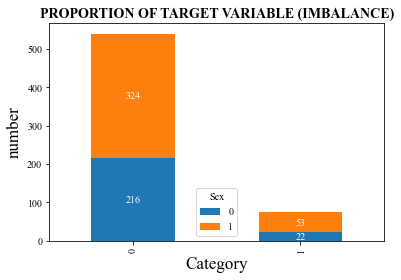

In [55]:

def plotDiseaseCount(data):
    ax = data.groupby(['Category', 'Sex']).size().unstack().plot(kind='bar', stacked=True)
    plt.legend(title="Sex",loc=8)
    plt.xlabel("Category",fontsize=17)
    plt.ylabel("number",fontsize=17)
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        padding = 0.25

        ax.text(rect.get_x() + width - padding, 
                rect.get_y() + height / 2, 
                int(height), 
                ha = 'center', va = 'center',
                color = "white")
        ax.patch.set_facecolor('white')
fig1=plotDiseaseCount(dados)
plt.title("PROPORTION OF TARGET VARIABLE (IMBALANCE)", fontsize = 14, fontweight = "bold")
plt.savefig('1.tif',dpi=400)
plt.show()

from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import ADASYN
oversample = ADASYN(random_state=25)
X = dados.drop(['Category'], axis=1)
Y = dados['Category']
X, Y = oversample.fit_resample(X, Y)
X["Category"] = Y
dados = X
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
dados


from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def up_lower_sampleData(data,up_percent =1,lower_percent = 1):
    data_majority = data[data["Categoria"] == 0 ]
    data_minority = data[data["Categoria"] == 1 ]
    up_index = np.random.randint(
        len(data_minority), size= int(up_percent * (len(data) - len(data_minority))))  # 随机给定上采样取出样本的序号
    up_data0 = data_minority.iloc[list(up_index)]  # 上采样
    lower_index = np.random.randint(
        len(data_majority), size=int(lower_percent * (len(data) - len(data_majority))))  # 随机给定下采样取出样本的序号
    lower_data1 = data_majority.iloc[list(lower_index)]  # 下采样
    data_up_lowersampled = pd.concat([up_data0, lower_data1])

    return data_up_lowersampled

dados = up_lower_sampleData(dados)
dados.shape

In [56]:
# Separar os dados em dois grupos
from imblearn.over_sampling import SMOTE
X = dados.drop(['Category'], axis=1)
y = dados['Category']
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
X, y = oversample.fit_resample(X, y)
X["Category"] = y
dados = X
dados

PROT         GGT        CREA      CHOL        CHE         BIL  \
0     69.000000   12.100000  106.000000  3.230000   6.930000    7.500000   
1     76.500000   15.600000   74.000000  4.800000  11.170000    3.900000   
2     79.300000   33.200000   86.000000  5.200000   8.840000    6.100000   
3     75.700000   33.800000   80.000000  4.740000   7.330000   18.900000   
4     68.700000   29.900000   76.000000  4.320000   9.150000    9.600000   
...         ...         ...         ...       ...        ...         ...   
1075  59.106732   29.952611   72.849192  2.143706   1.773630  118.313744   
1076  80.560049  101.936897   68.920342  3.939951   7.062224   10.219976   
1077  74.472024   44.289558   64.096868  3.200835   1.575574   28.300623   
1078  74.081052   96.060848   73.891108  6.516317   8.997709   15.936685   
1079  77.644433   52.491662   82.730503  3.286390   9.083185   10.863904   

            AST         ALT        ALP        ALB  Sex  Age  Category  
0     22.100000    7.700000  52.500000  38.500000    1   32         0  
1     24.700000   18.000000  70.300000  38.500000    1   32         0  
2     52.600000   36.200000  74.700000  46.900000    1   32         0  
3     22.600000   30.600000  52.000000  43.200000    1   32         0  
4     24.800000   32.600000  74.100000  39.200000    1   32         0  
...         ...         ...        ...        ...  ...  ...       ...  
1075  85.481234    2.444076  56.149579  30.343128    1   57         1  
1076  70.799023  127.018998  52.500000  39.659927    1   48         1  
1077  60.586214    3.077870  98.205012  25.482254    0   64         1  
1078  42.326677   18.121696  44.497533  41.202514    1   53         1  
1079  42.897255   44.813879  52.500000  37.983325    0   48         1  

[1080 rows x 13 columns]

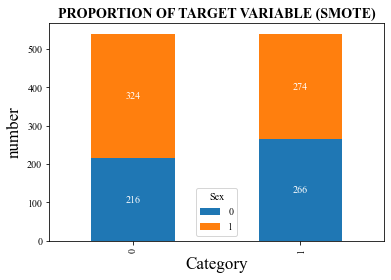

In [57]:
plotDiseaseCount(dados)
plt.title("PROPORTION OF TARGET VARIABLE (SMOTE)", fontsize = 14, fontweight = "bold")
plt.savefig('2.tif',dpi=400)
plt.show()

In [58]:
# Separar os dados em dois grupos
X = dados.drop(['Category'], axis=1)
y = dados['Category']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix

 # Gradient Booting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                                    max_features=2, n_estimators=500, random_state=0)

    # kNN
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', weights='uniform', n_jobs=-1)

    # Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=11, max_features = 2,random_state=90,criterion='gini',n_jobs=-1,oob_score = 'True')
rf_reg = RandomForestClassifier(max_depth =70 ,
                               max_features = 2,
                               n_estimators = 500,
                               random_state = 42,
                               n_jobs=-1,
                               criterion='gini',
                               oob_score = 'True')


classifier_svm = svm.SVC(C=1,kernel='rbf',gamma=1,decision_function_shape='ovr',probability=True)

    #AdaBoosst
adaB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)

    #XGB
xgb = XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=6,min_child_weight = 1,gamma = 0,
                        subsample = 0.8,scale_pos_weight = 1,random_state= 42)

In [ ]:

from sklearn.model_selection import KFold
# Informar os arrays para a separação, nesse caso X & y
# Informar o tamanho do conjunto de treino, nesse caso é de 70% dos dados serão para o treino da IA
# Informar o parâmetro "random_state" como 0 para que seja sempre os mesmos dados a serem usados quando for
# reproduzir novamente o treinamento da IA
skf = StratifiedKFold(n_splits=5)
#kf = KFold(n_splits=10)
accuracies_stats  = list()
AUC_stats         = list()
pre_stats         = list()
recall_stats      = list()
f1_stats          = list()
sensitivity_stats = list()
specificity_stats = list()
TP_list = list()
TN_list = list()
FP_list = list()
FN_list = list()

i=0
#for classifier in [rfc,rf_reg,classifier_svm,knn,adaB,xgb,gbc]:
for classifier in [rfc,classifier_svm,adaB]:
    print(classifier)
    for train_index,test_index in skf.split(X,y):
        X_treino,X_teste = X.iloc[train_index],X.iloc[test_index]
        y_treino,y_teste = y.iloc[train_index],y.iloc[test_index]  


        model = classifier.fit(X_treino, y_treino)
        


        #评估模型
        # Prever o resultado
        y_pred = model.predict(X_teste)

        score = metrics.accuracy_score(y_teste, y_pred)
        accuracies_stats.append(score)
        probs = model.predict_proba(X_teste)
        probs = probs[:, 1]
        AUC_stats.append(metrics.roc_auc_score(y_teste, probs))

        pre_stats.append(metrics.precision_score(y_teste, y_pred, average='binary'))
        recall_stats.append(metrics.recall_score(y_teste, y_pred, average='binary'))      
        f1_stats.append(metrics.f1_score(y_teste, y_pred, average='binary'))
        confusion = metrics.confusion_matrix(y_teste, y_pred)

        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]

        # recall of the positive
        sensitivity = TP / float(FN + TP)

        # recall of the negative class
        specificity = TN / (TN + FP)
        sensitivity_stats.append(sensitivity)
        specificity_stats.append(specificity)
        TP_list.append(TP)
        TN_list.append(TN)
        FP_list.append(FP)
        FN_list.append(FN)

    print("Average TP  = {}".format(np.round(np.array(TP_list).mean(), 4)))
    print("Average TN  = {}".format(np.round(np.array(TN_list).mean(), 4)))
    print("Average FP  = {}".format(np.round(np.array(FP_list).mean(), 4)))
    print("Average FN  = {}".format(np.round(np.array(FN_list).mean(), 4)))
    
    # metric
    matriz = confusion_matrix(y_teste, y_pred)
     # Criar um DataFrame para aramazenar os dados de "y_pred" e "y_teste"
    df_mc = pd.DataFrame(matriz, index=['no hepatitis', 'hepatitis'], columns=['no hepatitis', 'hepatitis'])
    
    # Determinar o tamanho da plotagem
    plt.figure(figsize=(7,4))
    
    # Criar a plotagem
    mapa_calor = sns.heatmap(data=df_mc,
                            annot=True,
                            cmap='RdPu',
                            fmt='.5g',
                            annot_kws={'size': 20})
    
    # Colocar o título da matriz de confusão
    #mapa_calor.set_title(f'Confusion Matrix for {classifier}', fontsize=25, y=1.05)
    
    # Adicionar a legenda nos eixos
    plt.xlabel('Predict label', fontsize=18)
    plt.ylabel('Actual label', fontsize=18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Mostrar a matriz de confusão
    #plt.show()
    
    plt.savefig("D:/figures\{}.tif".format(i),dpi=400,bbox_inches = 'tight')
    plt.clf()
    i=i+1
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(accuracies_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(accuracies_stats, p))

    print("Average accuracy  = {}".format(np.round(np.array(accuracies_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


    print("Average accuracy  = {}".format(np.round(np.array(accuracies_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(AUC_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(AUC_stats, p))

    print("Average AUC       = {}".format(np.round(np.array(AUC_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(pre_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(pre_stats, p))
    print("Average precision = {}".format(np.round(np.array(pre_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(recall_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(recall_stats, p))
    print("Average recall    = {}".format(np.round(np.array(recall_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(f1_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(f1_stats, p))
    print("Average f1 score = {}".format(np.round(np.array(f1_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(sensitivity_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(sensitivity_stats, p))
    print("Sensitivity score = {}".format(np.round(np.array(sensitivity_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(specificity_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(specificity_stats, p))
    print("Specificity score = {}".format(np.round(np.array(specificity_stats).mean(), 4)))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


In [62]:
X_treino

PROT         GGT        CREA      CHOL        CHE        BIL  \
0    69.000000   12.100000  106.000000  3.230000   6.930000   7.500000   
1    76.500000   15.600000   74.000000  4.800000  11.170000   3.900000   
2    79.300000   33.200000   86.000000  5.200000   8.840000   6.100000   
3    75.700000   33.800000   80.000000  4.740000   7.330000  18.900000   
4    68.700000   29.900000   76.000000  4.320000   9.150000   9.600000   
..         ...         ...         ...       ...        ...        ...   
967  75.695027  338.480754   69.419008  4.411228   4.359445  35.997058   
968  75.518443   38.736846   84.788439  3.644695   9.479996  11.246166   
969  71.849347   93.218392   81.574151  3.715085   7.381558  17.777487   
970  75.094461   45.935817   64.312103  3.236320   1.582555  29.929431   
971  77.807931   14.085537   58.418527  5.452969   7.080273   6.423859   

            AST        ALT         ALP        ALB  Sex  Age  
0     22.100000   7.700000   52.500000  38.500000    1   32  
1     24.700000  18.000000   70.300000  38.500000    1   32  
2     52.600000  36.200000   74.700000  46.900000    1   32  
3     22.600000  30.600000   52.000000  43.200000    1   32  
4     24.800000  32.600000   74.100000  39.200000    1   32  
..          ...        ...         ...        ...  ...  ...  
967  162.048522  17.387435  122.529808  35.093571    1   59  
968   34.563822  42.743059   38.349155  44.615415    0   46  
969  168.806613  39.405367   23.512241  45.833769    1   29  
970   63.762389   3.112774   97.303351  25.773113    0   64  
971   18.935854   4.509963   29.377474  43.211929    0   32  

[864 rows x 12 columns]

In [63]:
X_teste

PROT         GGT       CREA      CHOL        CHE         BIL  \
432   73.100000   13.400000  64.000000  5.380000   8.150000    8.100000   
433   72.400000   23.900000  52.000000  5.070000  12.410000    4.300000   
434   74.200000   13.000000  67.000000  5.580000   4.010000   23.100000   
435   73.100000   10.300000  74.000000  6.780000   9.060000    4.500000   
436   71.200000   12.100000  67.000000  4.050000   4.930000   17.300000   
...         ...         ...        ...       ...        ...         ...   
1075  59.106732   29.952611  72.849192  2.143706   1.773630  118.313744   
1076  80.560049  101.936897  68.920342  3.939951   7.062224   10.219976   
1077  74.472024   44.289558  64.096868  3.200835   1.575574   28.300623   
1078  74.081052   96.060848  73.891108  6.516317   8.997709   15.936685   
1079  77.644433   52.491662  82.730503  3.286390   9.083185   10.863904   

            AST         ALT        ALP        ALB  Sex  Age  
432   26.300000   17.300000  50.100000  43.700000    0   48  
433   23.200000   10.000000  93.300000  46.800000    0   48  
434   20.100000   12.100000  62.200000  42.500000    0   48  
435   23.400000   16.400000  52.500000  44.400000    0   48  
436   21.100000   17.200000  64.500000  44.400000    0   48  
...         ...         ...        ...        ...  ...  ...  
1075  85.481234    2.444076  56.149579  30.343128    1   57  
1076  70.799023  127.018998  52.500000  39.659927    1   48  
1077  60.586214    3.077870  98.205012  25.482254    0   64  
1078  42.326677   18.121696  44.497533  41.202514    1   53  
1079  42.897255   44.813879  52.500000  37.983325    0   48  

[216 rows x 12 columns]

In [ ]:
#网格搜索调优
# 对n_estimators进行优化
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':[50,120,160,200,250,300,350,400,450,500,600]}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_treino,y_treino)
print( gsearch1.best_params_, gsearch1.best_score_)

param_test2 = {'max_depth':[1,2,3,5,7,9,11,13,20,30,40,50,60,70,80,90,100,110,120,130,150]}#, 'min_samples_split':[100,120,150,180,200,300]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=50, min_samples_split=100,
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                                  param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X_treino,y_treino)
print( gsearch2.best_params_, gsearch2.best_score_)

#rf1 = RandomForestClassifier(n_estimators= 50, max_depth=2, min_samples_split=100, min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10)
#rf1.fit(X_treino,y_treino)
#print( rf1.oob_score_)
#y_predprob = rf1.predict_proba(X_teste)[:,1]
#print( "AUC Score (Train): %f" % metrics.roc_auc_score(y_teste, y_predprob))

#param_test3 = {'min_samples_split':[80,100,120,140], 'min_samples_leaf':[10,20,30,40,50,100]}
#gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, max_depth=2, max_features='sqrt' ,oob_score=True, random_state=10),param_grid = param_test3, scoring='roc_auc', cv=5)
#gsearch3.fit(X_treino,y_treino)
#print( gsearch3.best_params_, gsearch3.best_score_)

param_test4 = {'max_features':[2,3,5,7,9,11]}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, max_depth=2, min_samples_split=80,
                                  min_samples_leaf=10 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(X_treino,y_treino)
print( gsearch4.best_params_, gsearch4.best_score_)



In [ ]:
#贝叶斯优化调参
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# 函数中包含需要调整的参数
def rf_cv(n_estimators, max_features, max_depth,min_samples_leaf):
	# 交叉检验，得到的评分为贝叶斯调参优化目标
    val = cross_val_score(
    	# 由于bayes优化只能优化连续超参数，因此要加上int()转为离散超参数
        RandomForestClassifier(n_estimators=int(n_estimators),
                               #min_samples_split=int(min_samples_split),
                               min_samples_leaf = int(min_samples_leaf),
                               #max_leaf_nodes = int(max_leaf_nodes),
                               max_features=int(max_features),
                               max_depth=int(max_depth),
                               random_state=42,
                               oob_score = 'True'),
        X_treino, y_treino, scoring='neg_mean_squared_error', cv=10
    ).mean()
    return val
# 规定各参数搜索范围
rf_bo = BayesianOptimization(rf_cv,
                             {'n_estimators': (100, 1500),
                             # 'min_samples_split': (2, 150),
                              'max_features': (2, 12),
                              'max_depth': (5, 100),
                              'min_samples_leaf' : (70,200)
                             # 'max_leaf_nodes':(10,40)
                             })
rf_bo.maximize()


In [ ]:
rf_bo.max

In [64]:
%matplotlib inline
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [65]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_teste)

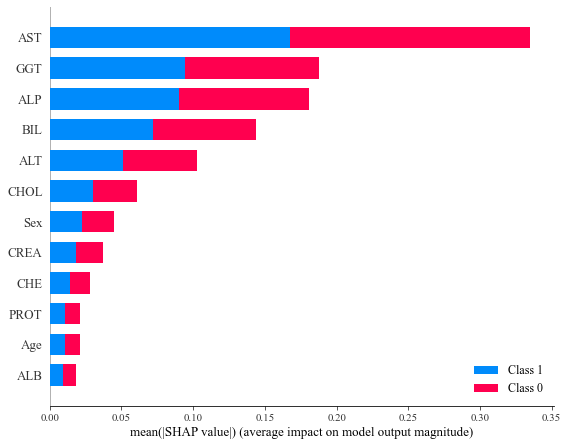

In [66]:
%matplotlib inline
shap.summary_plot(shap_values, X_teste, plot_type="bar",show=False)
plt.savefig("6.tif",dpi=400)
#条形图按降序显示失效模式的最重要变量的重要性列表

In [67]:
shap.initjs()

In [68]:
# Single value explainer
#thr选定的列对应于失效的弯曲模式，预测值（0.30）高于基值
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_teste.iloc[0,:])

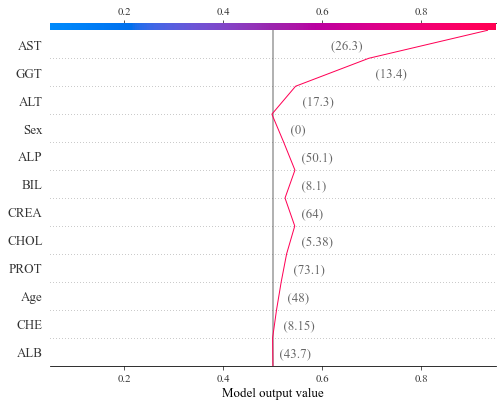

In [69]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][0,:], X_teste.iloc[0,:])


In [70]:
shap.force_plot(explainer.expected_value[1], shap_values[0][:len(X_teste),:], X_teste.iloc[:len(X_teste),:])

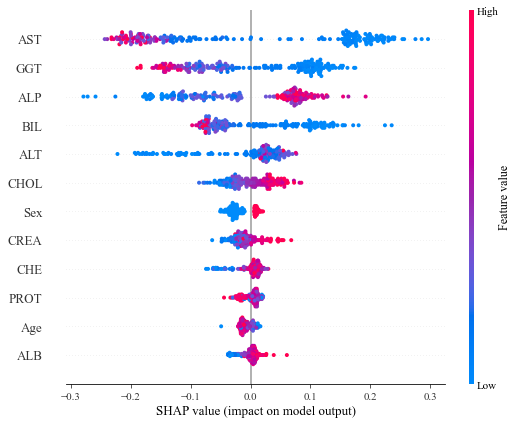

In [71]:
# Importance of Shap value for Class 0 prediction
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
shap.summary_plot(shap_values[0], X_teste,  show=False)
plt.savefig('4.tif',dpi=400)
#plt.savefig('Figure6_flexure.eps',format='eps', dpi=1000)
#在下图中，水平位置显示该值的影响是否与更高或更低的预测相关联
#beingsaved.savefig('destination_path.eps', format='eps', dpi=1000)
#Class 0 corresponds to flexure mode of failure.

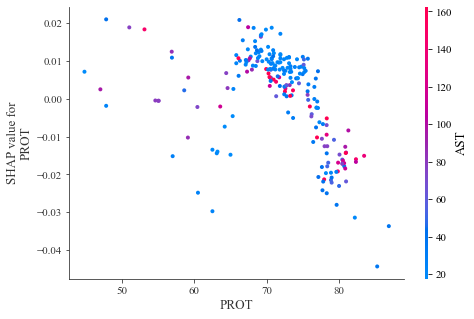

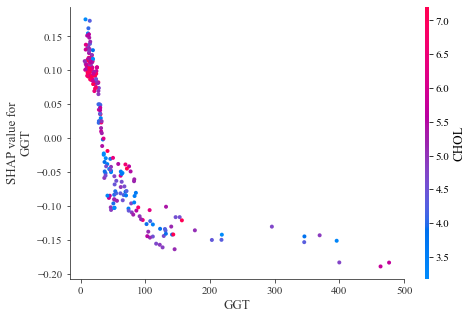

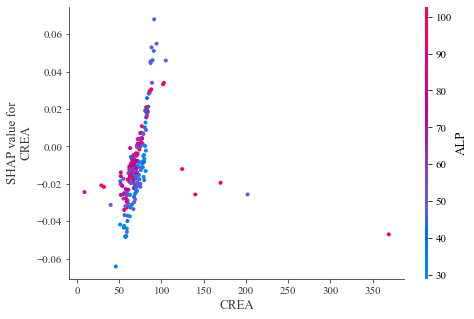

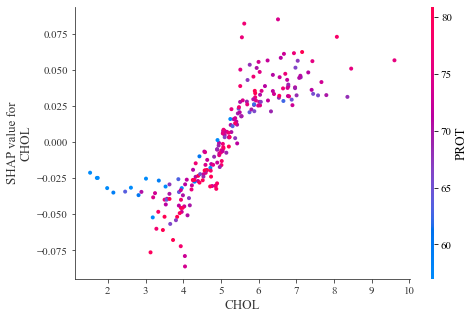

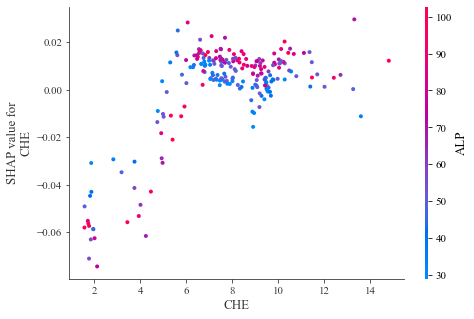

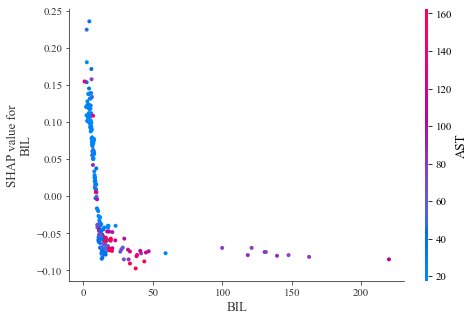

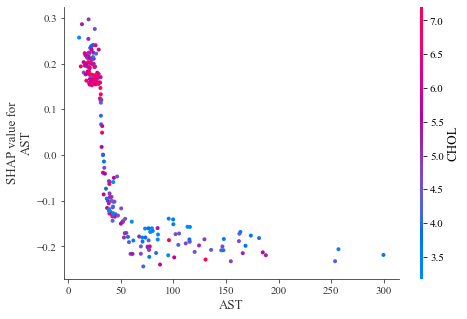

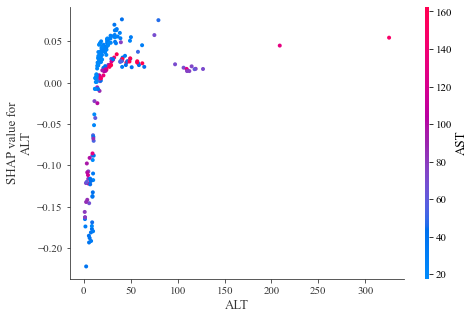

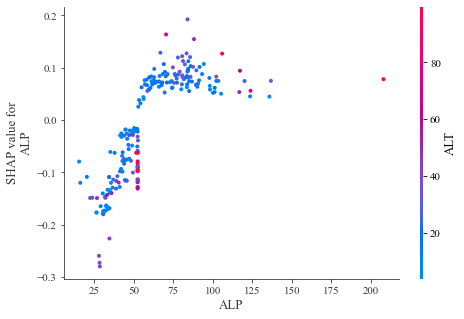

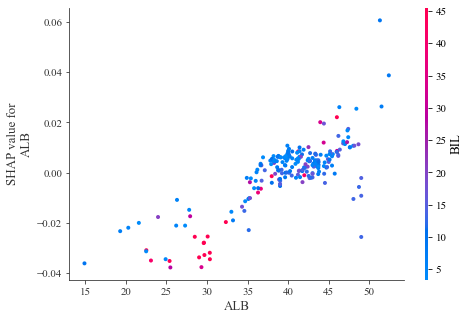

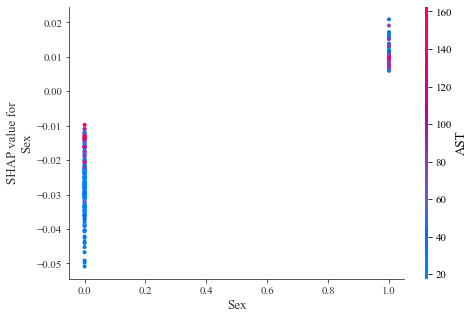

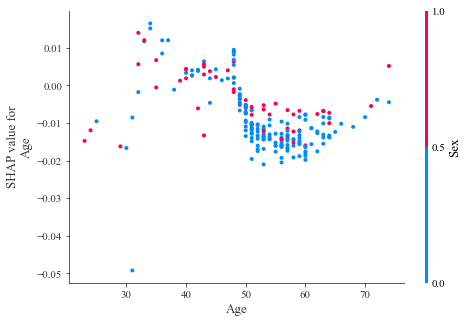

In [72]:
# Plot the dependance plot for class 0
n=1
for name in X_teste.columns:
    shap.dependence_plot(name, shap_values[0], X_teste, display_features=X_teste, show=False )
    #plt.savefig('name.eps',format='eps', dpi=1000)
#     plt.savefig("Graph_Column" + str(n) +".eps", format="EPS")
#     n=n+1

# 使用LIme进行解释

In [73]:
import lime_stability
from lime.discretize import QuartileDiscretizer, DecileDiscretizer, EntropyDiscretizer
from lime_stability.stability import LimeTabularExplainerOvr
from lime_stability.utils import LocalModelError
 
explainer = LimeTabularExplainerOvr(training_data=np.array(X_treino),
                                    mode="classification",
                                    feature_names=X_treino.columns,
                                    class_names=['no hepatitis','hepatitis'],
                                    discretize_continuous=True)


In [77]:
exp = explainer.explain_instance(data_row=X_teste.iloc[0], predict_fn=rfc.predict_proba)
exp.show_in_notebook(show_table=True)


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [78]:
exp = explainer.explain_instance(data_row=X_teste.iloc[214], predict_fn=rfc.predict_proba)
exp.show_in_notebook(show_table=True)


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
